# EDA

ref: https://www.kaggle.com/code/clehmann10/birdclef-eda-tutorial

## Setup

In [6]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import librosa
import librosa.display

In [7]:
dir = "/home/tomoya/kaggle/birdclef-2025/input/birdclef-2025"

submission_df = pd.read_csv(os.path.join(dir, "sample_submission.csv"))
taxonomy_df = pd.read_csv(os.path.join(dir, "taxonomy.csv"))
train_df = pd.read_csv(os.path.join(dir, "train.csv"))
with open(os.path.join(dir, "recording_location.txt"), "r") as file:
    recording_location = file.read()

In [9]:
pd.set_option('display.max_columns', None)

## View data

In [10]:
submission_df.head()

,row_id,1139490,1192948,1194042,126247,1346504,134933,135045,1462711,1462737,1564122,21038,21116,21211,22333,22973,22976,24272,24292,24322,41663,41778,41970,42007,42087,42113,46010,47067,476537,476538,48124,50186,517119,523060,528041,52884,548639,555086,555142,566513,64862,65336,65344,65349,65373,65419,65448,65547,65962,66016,66531,66578,66893,67082,67252,714022,715170,787625,81930,868458,963335,amakin1,amekes,ampkin1,anhing,babwar,bafibi1,banana,baymac,bbwduc,bicwre1,bkcdon,bkmtou1,blbgra1,blbwre1,blcant4,blchaw1,blcjay1,blctit1,blhpar1,blkvul,bobfly1,bobher1,brtpar1,bubcur1,bubwre1,bucmot3,bugtan,butsal1,cargra1,cattyr,chbant1,chfmac1,cinbec1,cocher1,cocwoo1,colara1,colcha1,compau,compot1,cotfly1,crbtan1,crcwoo1,crebob1,cregua1,creoro1,eardov1,fotfly,gohman1,grasal4,grbhaw1,greani1,greegr,greibi1,grekis,grepot1,gretin1,grnkin,grysee1,gybmar,gycwor1,labter1,laufal1,leagre,linwoo1,littin1,mastit1,neocor,norscr1,olipic1,orcpar,palhor2,paltan1,pavpig2,piepuf1,pirfly1,piwtyr1,plbwoo1,plctan1,plukit1,purgal2,ragmac1,rebbla1,recwoo1,rinkin1,roahaw,rosspo1,royfly1,rtlhum,rubsee1,rufmot1,rugdov,rumfly1,ruther1,rutjac1,rutpuf1,saffin,sahpar1,savhaw1,secfly1,shghum1,shtfly1,smbani,snoegr,sobtyr1,socfly1,solsan,soulap1,spbwoo1,speowl1,spepar1,srwswa1,stbwoo2,strcuc1,strfly1,strher,strowl1,tbsfin1,thbeup1,thlsch3,trokin,tropar,trsowl,turvul,verfly,watjac1,wbwwre1,whbant1,whbman1,whfant1,whmtyr1,whtdov,whttro1,whwswa1,woosto,y00678,yebela1,yebfly1,yebsee1,yecspi2,yectyr1,yehbla2,yehcar1,yelori1,yeofly1,yercac1,ywcpar
0,soundscape_8358733_5,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854
1,soundscape_8358733_10,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0.004854,0

In [12]:
taxonomy_df.head(200)

,primary_label,inat_taxon_id,scientific_name,common_name,class_name
0,1139490,1139490,Ragoniella pulchella,Ragoniella pulchella,Insecta
1,1192948,1192948,Oxyprora surinamensis,Oxyprora surinamensis,Insecta
2,1194042,1194042,Copiphora colombiae,Copiphora colombiae,Insecta
3,126247,126247,Leptodactylus insularum,Spotted Foam-nest Frog,Amphibia
4,1346504,1346504,Neoconocephalus brachypterus,Neoconocephalus brachypterus,Insecta
...,...,...,...,...,...
195,yebela1,16714,Elaenia flavogaster,Yellow-bellied Elaenia,Aves
196,yebfly1,16559,Tolmomyias flaviventris,Yellow-breasted Flycatcher,Aves
197,yebsee1,9515,Sporophila nigricollis,Yellow-bellied Seedeater,Aves
198,yecspi2,11364,Certhiaxis cinnamomeus,Yellow-chinned Spinetail,Aves


In [15]:
train_df.head(200)

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,22973,[''],[''],22973/iNat154035.ogg,iNat,0.0,https://static.inaturalist.org/sounds/154035.wav,-22.4093,-47.5421,Leptodactylus fuscus,Whistling Grass Frog,Carlos Otávio Gussoni,cc-by-nc 4.0
196,22973,[''],[''],22973/iNat157085.ogg,iNat,0.0,https://static.inaturalist.org/sounds/157085.wav,-22.3710,-47.5224,Leptodactylus fuscus,Whistling Grass Frog,Carlos Otávio Gussoni,cc-by-nc 4.0
197,22973,[''],[''],22973/iNat218912.ogg,iNat,0.0,https://static.inaturalist.org/sounds/218912.m4a,10.6531,-61.4196,Leptodactylus fuscus,Whistling Grass Frog,Dr M Chin Sue Min,cc-by-nc 4.0
198,22973,[''],[''],22973/iNat28425.ogg,iNat,0.0,https://static.inaturalist.org/sounds/28425.mp3,-29.5093,-55.6369,Leptodactylus fuscus,Whistling Grass Frog,João Gava Just,cc-by-nc 4.0


## Analysis

### 統計量

In [19]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
primary_label,28564,206,grekis,990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
secondary_labels,28564,745,[''],25885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,28564,736,['song'],9437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
filename,28564,28564,1139490/CSA36385.ogg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collection,28564,3,XC,21204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,28564.0,NaN,NaN,NaN,2.917063,1.964896,0.0,0.0,4.0,4.5,5.0
url,28564,28552,https://static.inaturalist.org/sounds/1020465.wav,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,27755.0,NaN,NaN,NaN,-0.53348,17.609276,-54.8574,-15.0846,1.1316,9.511,68.3748
longitude,27755.0,NaN,NaN,NaN,-68.52438,21.614566,-163.68,-79.6492,-73.4954,-53.8018,153.5514
scientific_name,28564,206,Pitangus sulphuratus,990,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### rare species の抽出

狙い: 不均衡を定量化。クラス重み or up-sample 閾値を決める指標に。

Rare species: 39


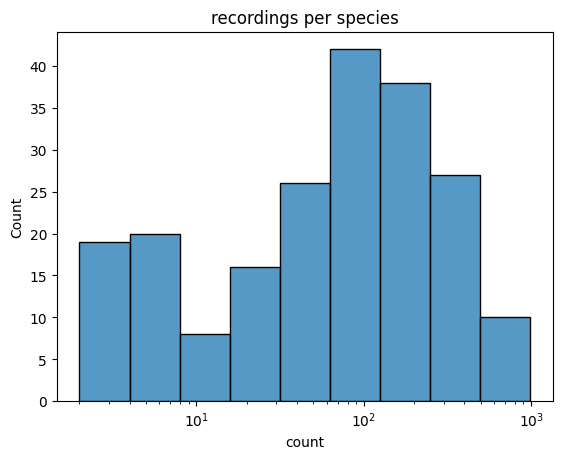

In [20]:
cnt = train_df['primary_label'].value_counts()
sns.histplot(cnt, log_scale=True); plt.title('recordings per species')
rare = cnt[cnt<10].index.tolist()

print(f"Rare species: {len(rare)}") # TTA/upsample 対象

### Taxon ごとの件数を可視化

狙い: Taxon ごとの件数を可視化 → 専用モデルを切るか一本化か判断

missing class_name rows: 0


/tmp/ipykernel_4055107/1927833943.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


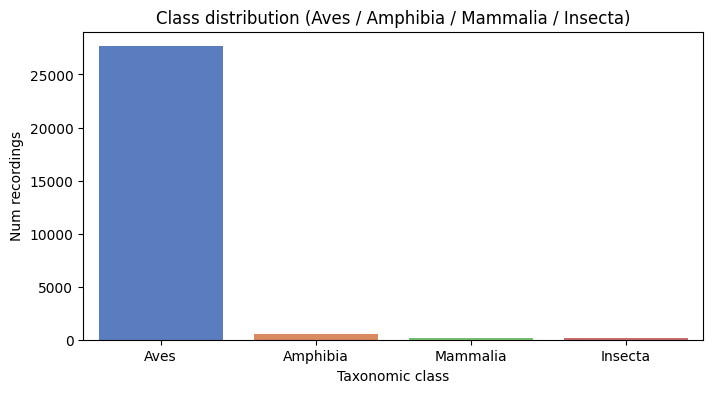

In [23]:
# ── taxonomy を結合してクラス名を付与 ────────────────────────────────
train_wclass = (
    train_df
    .merge(
        taxonomy_df[['primary_label', 'class_name']],
        on='primary_label',
        how='left',
    )
)

# 欠損チェック（train に載っていて taxonomy にない ID があるか）
missing = train_wclass['class_name'].isna().sum()
print(f"missing class_name rows: {missing}")

# ── 可視化 ────────────────────────────────────────────────────────
plt.figure(figsize=(8,4))
sns.countplot(
    data=train_wclass,
    x='class_name',
    order=train_wclass['class_name'].value_counts().index,
    palette='muted'
)
plt.title('Class distribution (Aves / Amphibia / Mammalia / Insecta)')
plt.xlabel('Taxonomic class')
plt.ylabel('Num recordings')
plt.show()

In [24]:
train_wclass.groupby('class_name').size().pipe(lambda s:
    pd.DataFrame({'count':s, 'ratio_%':100*s/len(train_wclass)}))

,count,ratio_%
class_name,,
Amphibia,583,2.041031
Aves,27648,96.793166
Insecta,155,0.542641
Mammalia,178,0.623162


### 録音長・SNR・重複チェック

狙い:

鳴き声が 1–2 s しかないファイル = Cyclic padding 候補

完全重複は fold リーク源になるので排除。

Exact duplicates in sample: 0


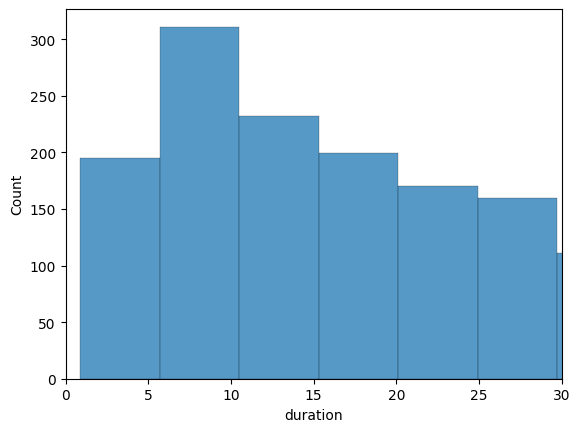

In [26]:
import soundfile as sf, glob, hashlib

def meta_audio_stats(row):
    path = f"../input/birdclef-2025/train_audio/{row.filename}"
    dur = sf.info(path).duration
    row['duration'] = dur
    with open(path, 'rb') as f:
        row['md5'] = hashlib.md5(f.read()).hexdigest()
    return row

tiny = train_df.sample(2000).apply(meta_audio_stats, axis=1)  # 部分サンプリングで十分
sns.histplot(tiny['duration']); plt.xlim(0,30)
dup = tiny.duplicated('md5').sum(); print(f"Exact duplicates in sample: {dup}")

### 空間分布

狙い: 緯度・経度が極端に外れたサンプル (= 誤地理情報) を発見。
地域クラス差が大なら Geo-aware validation split を検討。

In [27]:
# m = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=5)
# folium.plugins.FastMarkerCluster(df[['latitude','longitude']].dropna().values.tolist()).add_to(m)
# m

### Secondary labels の濃淡

狙い: multi-label対応必要度を把握。

Secondary を “ignore / down-weight / full multi-label” のどれで扱うか決める材料。

Text(0.5, 1.0, 'Number of secondary labels per recording')

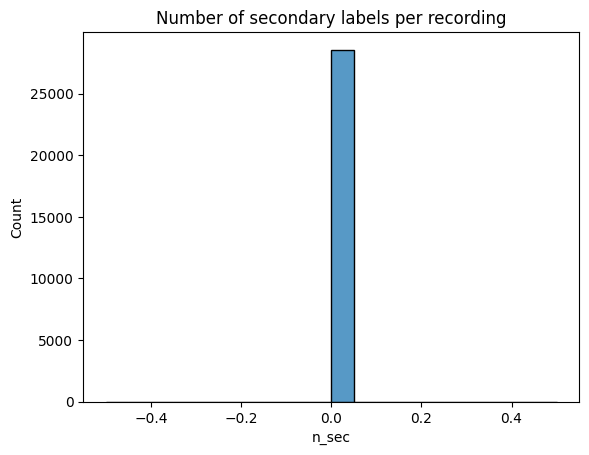

In [28]:
train_df["n_sec"] = train_df["secondary_labels"].str.count(";")// 2 # '' で括られている個数
sns.histplot(train_df["n_sec"], bins=20)
plt.title('Number of secondary labels per recording')

### コレクション由来 × レーティング質

狙い: 「CSA は rating=0 が多い」などの傾向を掴み、低品質ソースに強めの noise Aug やフィルタを設定。

Text(0.5, 1.0, 'Source vs Quality')

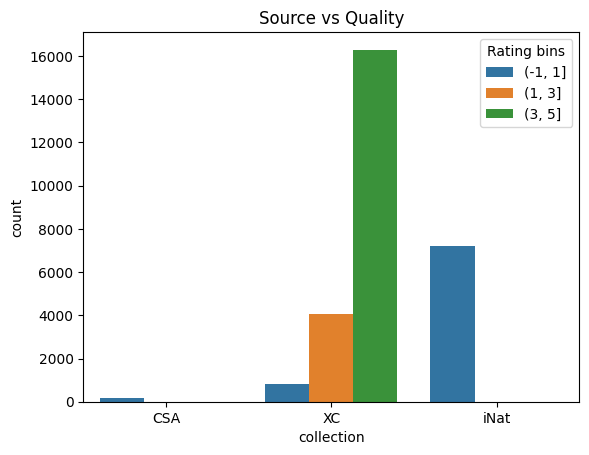

In [29]:
ax = sns.countplot(data=train_df, x='collection', hue=pd.cut(train_df['rating'],[-1,1,3,5]))
plt.legend(title='Rating bins'); plt.title('Source vs Quality')

### Soundscape 解析プレビュー

狙い:

5 s 窓のフレーム数を確認 → target_w とのスケーリング決定

テストに似た環境ノイズを体感し、デノイザ or Aug をイメージ。

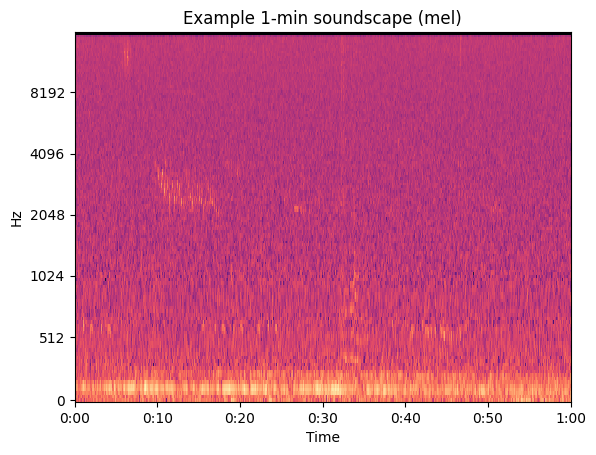

frames per 5 s window: 312


In [31]:
import librosa, librosa.display

ex = glob.glob('../input/birdclef-2025/train_soundscapes/*.ogg')[0]
y, sr = librosa.load(ex, sr=32000)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=512, n_mels=128)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.title('Example 1-min soundscape (mel)'); plt.show()
print(f"frames per 5 s window: {int(5*sr/512)}")  # モデル入力幅の設計に直結